In [26]:
from neo4j import GraphDatabase
from neo4j.graph import Node, Relationship
from neo4j.data import Record
import networkx as nx
from neo4j import GraphDatabase
from neo4j.graph import Node, Relationship
from neo4j.data import Record
import networkx as nx

In [27]:
URI = "neo4j+s://b91ef68f.databases.neo4j.io"
AUTH = ("neo4j", "gStP5BlGC9AwvbAoGyJz4uAZC3n-HtihkyACESk10k4")

In [28]:
def graph_from_cypher(data):
    G = nx.MultiDiGraph()

    def add_node(node):
        u = node.id
        if G.has_node(u):
            return
        G.add_node(u, labels=node._labels, properties=dict(node))

    def add_edge(relation):
        for node in (relation.start_node, relation.end_node):
            add_node(node)
        u = relation.start_node.id
        v = relation.end_node.id
        eid = relation.id
        if G.has_edge(u, v, key=eid):
            return
        G.add_edge(u, v, key=eid, type_=relation.type, properties=dict(relation))

    for d in data:
        for entry in d.values():
            if isinstance(entry, Node):
                add_node(entry)
            elif isinstance(entry, Relationship):
                add_edge(entry)
            elif isinstance(entry, list):  # Handle lists of nodes/relationships
                for item in entry:
                    if isinstance(item, Node):
                        add_node(item)
                    elif isinstance(item, Relationship):
                        add_edge(item)
    
    return G

def extract_data(tx, query):
    result = tx.run(query)
    data = []
    for record in result:
        data.append(record)
    return data

def fetch_data(query):
    with GraphDatabase.driver(URI, auth=AUTH) as driver:
        with driver.session() as session:
            data = session.read_transaction(extract_data, query)
    return data

In [29]:
def visualize_graph(G):
    pos = nx.spring_layout(G)  # Position nodes using the Fruchterman-Reingold force-directed algorithm.
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    edge_labels = {(u, v): d['type_'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title('Graph Visualization')
    plt.show()

In [30]:
import matplotlib.pyplot as plt

In [31]:
if __name__ == '__main__':
    query = """
    MATCH (n)-[r]->(m)
    RETURN n, r, m
    """
    
    # Fetch data from Neo4j
    data = fetch_data(query)
    
    # Convert to NetworkX graph
    G = graph_from_cypher(data)

C:\Users\bvbry\AppData\Local\Temp\ipykernel_20236\944907301.py:45: DeprecationWarning: read_transaction has been renamed to execute_read
  data = session.read_transaction(extract_data, query)
C:\Users\bvbry\AppData\Local\Temp\ipykernel_20236\944907301.py:5: DeprecationWarning: `id` is deprecated, use `element_id` instead
  u = node.id
C:\Users\bvbry\AppData\Local\Temp\ipykernel_20236\944907301.py:13: DeprecationWarning: `id` is deprecated, use `element_id` instead
  u = relation.start_node.id
C:\Users\bvbry\AppData\Local\Temp\ipykernel_20236\944907301.py:14: DeprecationWarning: `id` is deprecated, use `element_id` instead
  v = relation.end_node.id
C:\Users\bvbry\AppData\Local\Temp\ipykernel_20236\944907301.py:15: DeprecationWarning: `id` is deprecated, use `element_id` instead
  eid = relation.id


In [32]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4266
Number of edges: 6112


In [33]:
# Print node attributes
for node in G.nodes(data=True):
    print(node)

(2469, {'labels': frozenset({'mailer'}), 'properties': {'MID_LAST_UPD_DATE': '2020-01-31', 'mailerid': '55d8f5f7ff443d5b0ee9dd0c9c25e47ce1f99b2c43b4cb6875a2d25f5dc2e5b3', 'customerrecordstartdate': neo4j.time.DateTime(2013, 11, 27, 0, 0, 0, 0, tzinfo=<UTC>), 'delinked': 'NA', 'MID_LAST_UPD_USERID': '5c48ac4e3a5424e54a8810b6f5dfa03c70dc515b8c1c8b952ed1247ad238fc71'}})
(101155, {'labels': frozenset({'mailPiece'}), 'properties': {'firstscan_dest_zone': '5', 'USPSDimensionalHeight': '1.77', 'USPSDimensionalWidth': '14.76', 'firstscan_zone_gt_start_zone': False, 'firstzip_startzip_diff': True, 'customerrecordstartdate': '2013-11-27', 'mailpieceid': '2325b3f81c07a2315ed6fe71070c661ea01d7619fb4714005e5867be0d5af32b', 'start_dest_zone': '5', 'USPSDimensionalLength': '10.24'}})
(101156, {'labels': frozenset({'mailPiece'}), 'properties': {'firstscan_dest_zone': '6', 'USPSDimensionalHeight': '1.77', 'USPSDimensionalWidth': '15.94', 'firstscan_zone_gt_start_zone': False, 'firstzip_startzip_diff': 

In [34]:
# Print edge attributes
for edge in G.edges(data=True):
    print(edge)

(2469, 101155, {'type_': 'mails', 'properties': {}})
(2469, 101156, {'type_': 'mails', 'properties': {}})
(2469, 101157, {'type_': 'mails', 'properties': {}})
(2469, 101158, {'type_': 'mails', 'properties': {}})
(101155, 102098, {'type_': 'goes to', 'properties': {}})
(101155, 102836, {'type_': 'originated at', 'properties': {}})
(101156, 102099, {'type_': 'goes to', 'properties': {}})
(101156, 102836, {'type_': 'originated at', 'properties': {}})
(101157, 102100, {'type_': 'goes to', 'properties': {}})
(101157, 102836, {'type_': 'originated at', 'properties': {}})
(101158, 102101, {'type_': 'goes to', 'properties': {}})
(101158, 102836, {'type_': 'originated at', 'properties': {}})
(2648, 101106, {'type_': 'mails', 'properties': {}})
(101106, 102054, {'type_': 'goes to', 'properties': {}})
(101106, 102824, {'type_': 'originated at', 'properties': {}})
(2667, 101358, {'type_': 'mails', 'properties': {}})
(101358, 102286, {'type_': 'goes to', 'properties': {}})
(101358, 102855, {'type_'

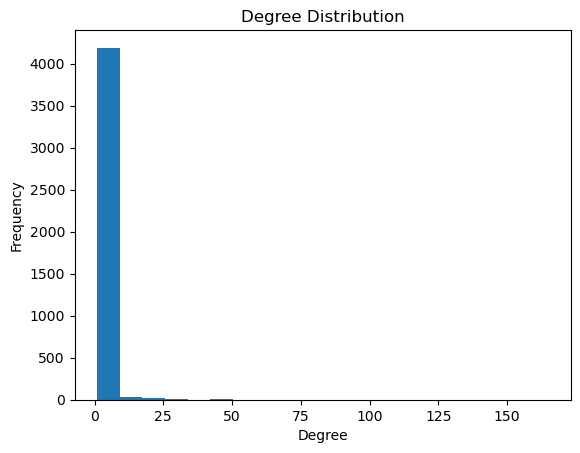

In [35]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=20)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [38]:
# Identify isolated nodes (nodes with degree 0)
isolated_nodes = [node for node, degree in G.degree() if degree == 0]
num_isolated_nodes = len(isolated_nodes)

print(f"Number of isolated nodes: {num_isolated_nodes}")
print("Isolated nodes:", isolated_nodes)

Number of isolated nodes: 0
Isolated nodes: []


In [39]:
import numpy as np
from collections import Counter

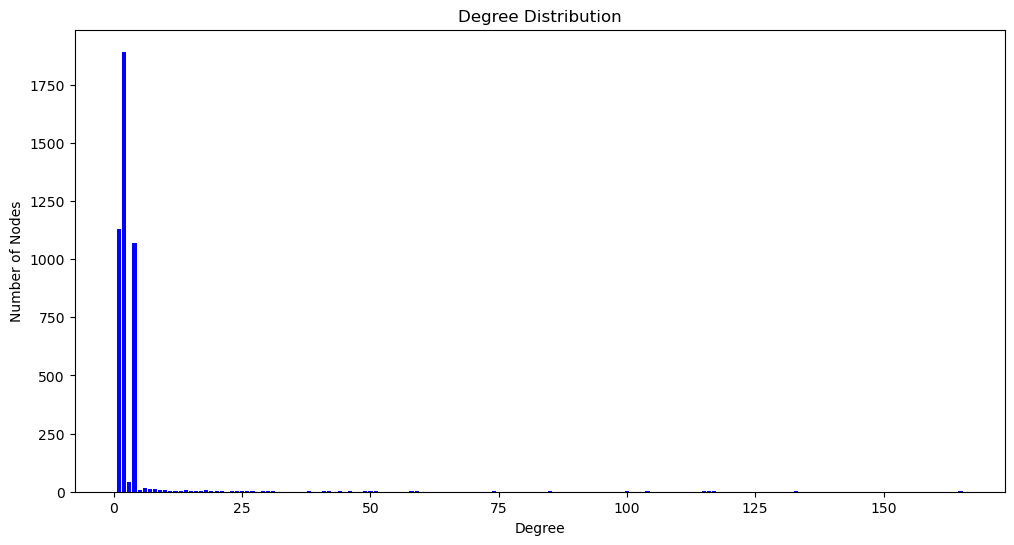

In [40]:
# Compute degree distribution
degrees = [G.degree(n) for n in G.nodes()]
degree_count = Counter(degrees)
deg, cnt = zip(*degree_count.items())

# Plot degree distribution
plt.figure(figsize=(12, 6))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

In [41]:
# Compute descriptive statistics
mean_degree = np.mean(degrees)
median_degree = np.median(degrees)
mode_degree = Counter(degrees).most_common(1)[0][0]
variance_degree = np.var(degrees)
std_dev_degree = np.std(degrees)

print(f"Mean degree: {mean_degree}")
print(f"Median degree: {median_degree}")
print(f"Mode degree: {mode_degree}")
print(f"Variance of degree: {variance_degree}")
print(f"Standard deviation of degree: {std_dev_degree}")

Mean degree: 2.8654477262072198
Median degree: 2.0
Mode degree: 2
Variance of degree: 36.87453516053515
Standard deviation of degree: 6.072440626349109


On average, each node in the network has approx. 2.87 connections. The mode degree of 2 indicates that many nodes have exactly 2 connections. However, the Standard Deviation of 6.07 suggests that there is a significant variation in the node degrees.

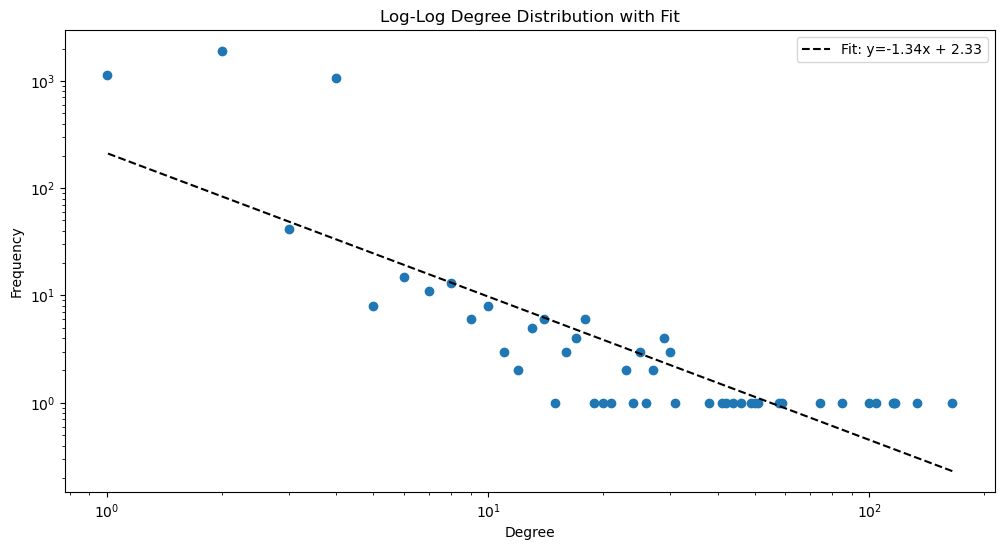

Slope of the log-log plot (power-law exponent): -1.34


In [45]:
log_degrees = np.log10(deg)
log_counts = np.log10(cnt)

# Fit a linear model to the log-log plot
fit = np.polyfit(log_degrees, log_counts, 1)
fit_fn = np.poly1d(fit)

# Plot the fitted line on the log-log plot
plt.figure(figsize=(12, 6))
plt.loglog(deg, cnt, marker='o', linestyle='none')
plt.plot(deg, 10**fit_fn(log_degrees), '--k', label=f'Fit: y={fit[0]:.2f}x + {fit[1]:.2f}')
plt.title("Log-Log Degree Distribution with Fit")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print the slope (exponent of the power-law distribution)
print(f"Slope of the log-log plot (power-law exponent): {fit[0]:.2f}")

An exponent of -1.34 suggests that the network has a relatively slow decay in the degree distribution, meaning that high-degree nodes (hubs) are more common. There are several highly connected nodes (hubs) that play a significant role in the network's structure and connectivity. Scale-Free characteristic, tend to be robust against random failures but are vulnerable to targeted attacks on hubs. Removing or attacking a few high-degree nodes can significantly disrupt the network.

In [48]:
# Threshold for high-degree nodes [nodes with degree greater than mean + 2*std_dev]
threshold = mean_degree + 2 * std_dev_degree
high_degree_nodes = [node for node, degree in G.degree() if degree > threshold]

print(f"High-degree nodes (degree > {threshold}):")
print(high_degree_nodes)

# Analyze high-degree nodes
for node in high_degree_nodes:
    print(f"Node {node} has degree {G.degree(node)}")

High-degree nodes (degree > 15.010328978905438):
[2731, 2733, 2758, 2791, 2840, 2841, 2846, 2859, 2872, 2882, 2885, 2887, 2893, 2894, 3289, 3305, 3318, 3319, 3320, 101960, 102806, 102813, 102819, 102824, 102833, 102836, 102841, 102844, 102848, 102851, 102862, 102869, 102874, 102878, 102880, 102904, 104099, 103905, 103921, 103969, 103981, 103995, 103998, 104013, 104025, 104028, 104031, 104032, 104033, 104035, 104036, 104042]
Node 2731 has degree 27
Node 2733 has degree 19
Node 2758 has degree 18
Node 2791 has degree 25
Node 2840 has degree 20
Node 2841 has degree 18
Node 2846 has degree 42
Node 2859 has degree 17
Node 2872 has degree 30
Node 2882 has degree 27
Node 2885 has degree 30
Node 2887 has degree 23
Node 2893 has degree 18
Node 2894 has degree 18
Node 3289 has degree 116
Node 3305 has degree 51
Node 3318 has degree 46
Node 3319 has degree 100
Node 3320 has degree 58
Node 101960 has degree 165
Node 102806 has degree 59
Node 102813 has degree 133
Node 102819 has degree 41
Node 102

Nodes like 101960, 102813, and 102862 have exceptionally high degrees (165, 133, and 117 respectively), indicating tthey are central hubs in the network. Hubs are critical in maintaining the network's connectivity. They often serve as bridges between different parts of the network. There are a total of 15 nodes that resulted in having high degrees (connections).

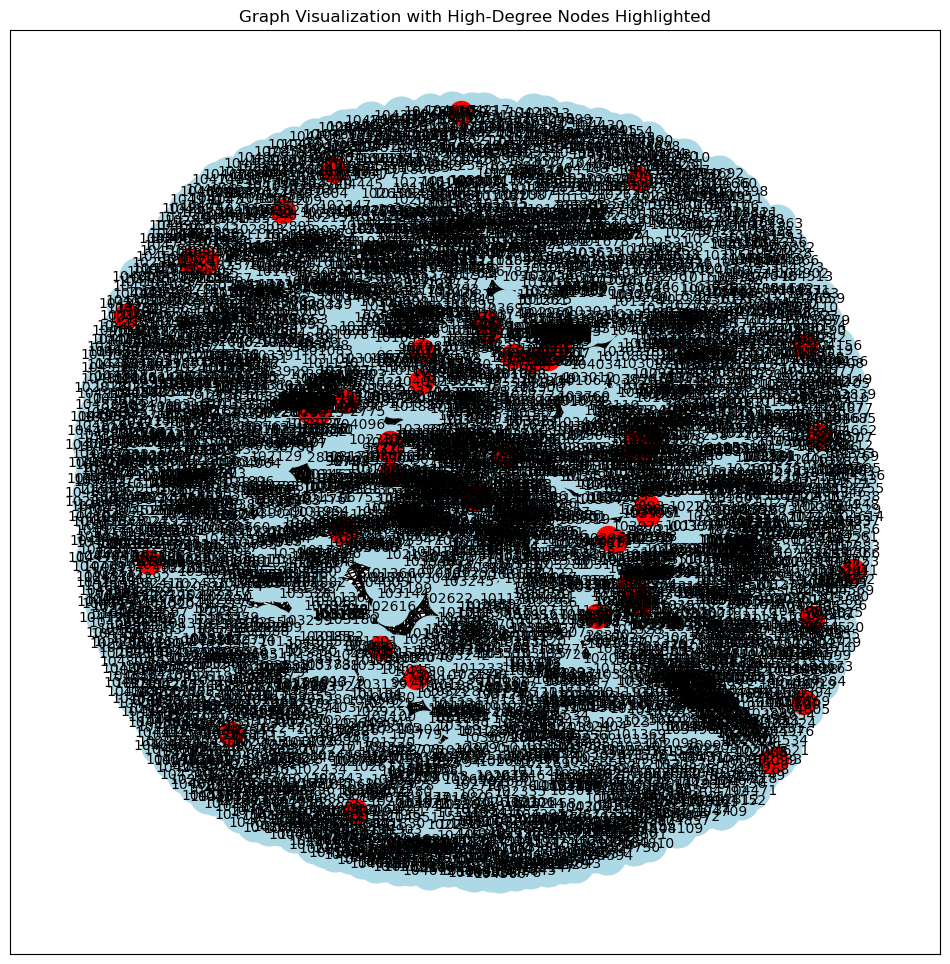

In [47]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Highlight high-degree nodes in red
nx.draw_networkx_nodes(G, pos, nodelist=high_degree_nodes, node_color='red')

plt.title('Graph Visualization with High-Degree Nodes Highlighted')
plt.show()


In [50]:
!pip install python-louvain

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/204.6 kB 435.7 kB/s eta 0:00:01
     ---------------------------- --------- 153.6/204.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=0ec64c03461c678b1ab2a85750594a49f5fc28717186b0c25ecc2fe308e89d3c
  Stored in directory: c:\users\bvbry\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain


In [51]:
import community as community_louvain

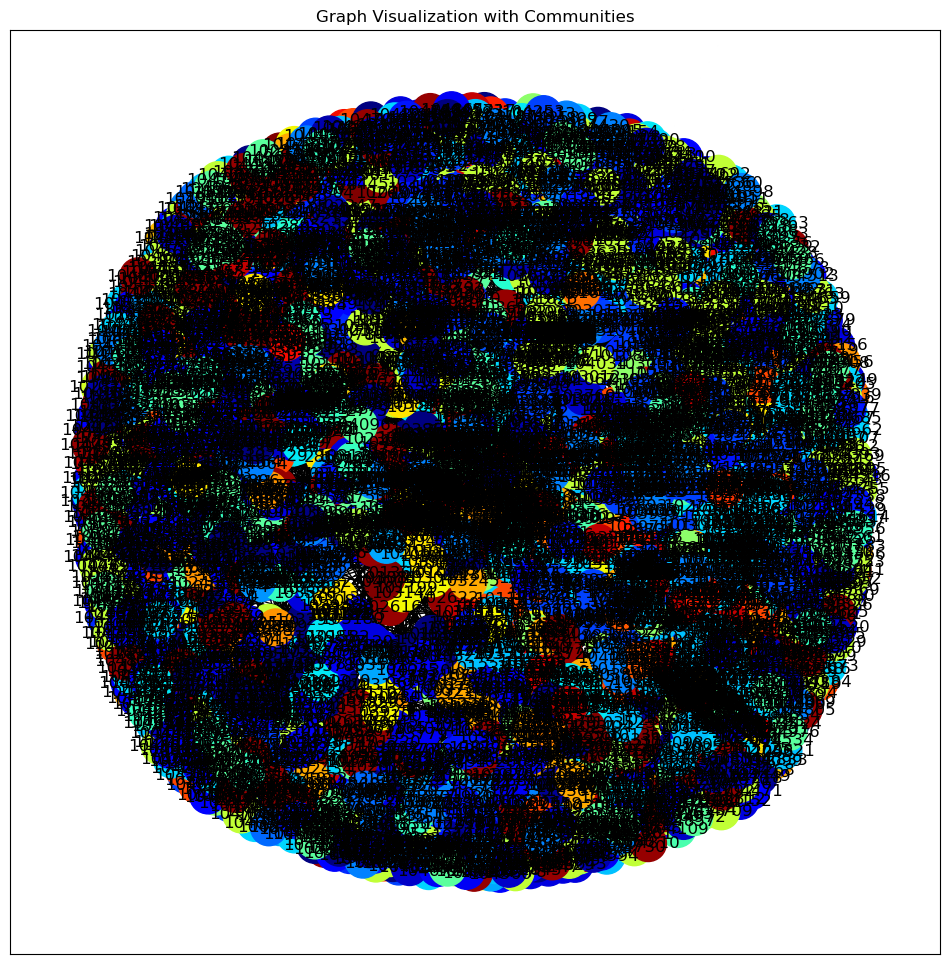

In [52]:
# Community Detection using Louvain method
# Compute the best partition
partition = community_louvain.best_partition(G.to_undirected())

# Draw the graph with community colors
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, pos, node_color=list(partition.values()), node_size=700, cmap=plt.cm.jet)
plt.title('Graph Visualization with Communities')
plt.show()

In [60]:
from networkx.algorithms.community import girvan_newman

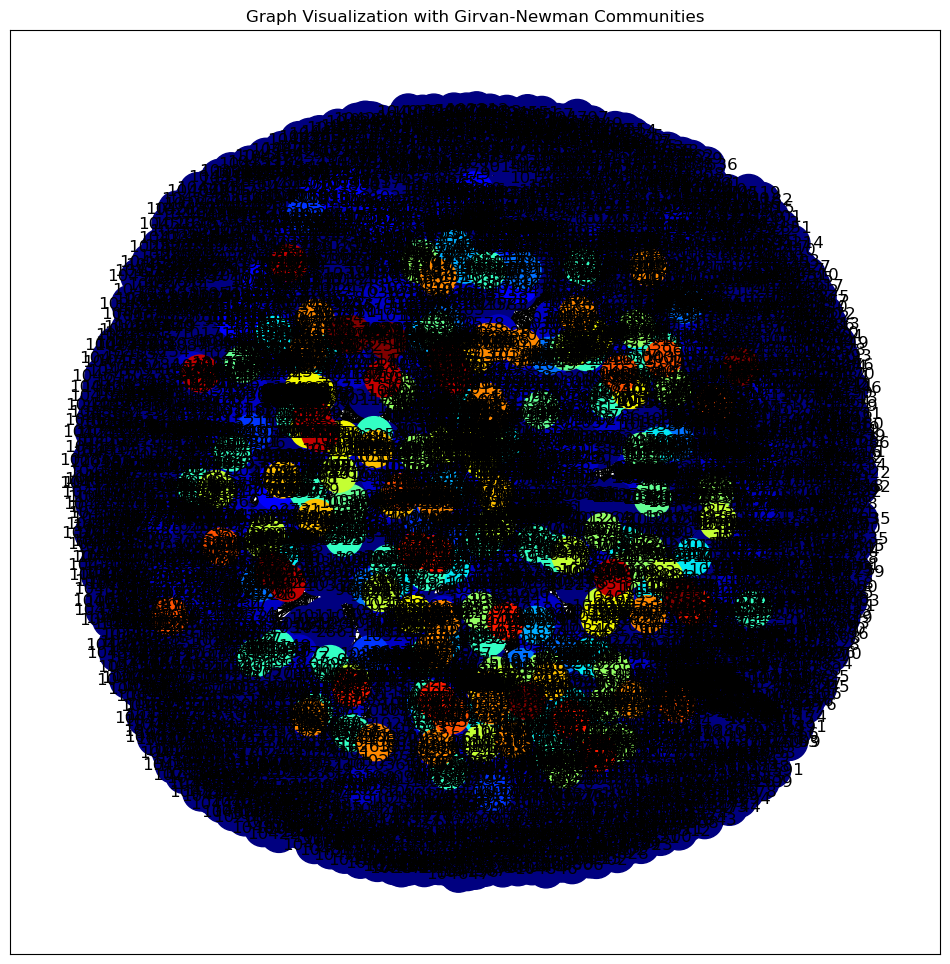

In [61]:
comp = girvan_newman(G)
# Get the first level of communities
first_level_communities = next(comp)
# Convert to a list of sets
communities = [list(c) for c in first_level_communities]

# Create a partition dictionary to color nodes
partition = {}
for i, community in enumerate(communities):
    for node in community:
        partition[node] = i

# Visualize the graph with community colors
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), node_size=700, cmap=plt.cm.jet)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title('Graph Visualization with Girvan-Newman Communities')
plt.show()

Multiple communities highlighted in Louvain. <br> 
In Girvan-Newman,  it computes communities by iteratively removing edges with the highest betweenness centrality thereby reavealing the underlying community structure.
<br> I'll look to perform other EDA methods before continuing further in analyzing communities.

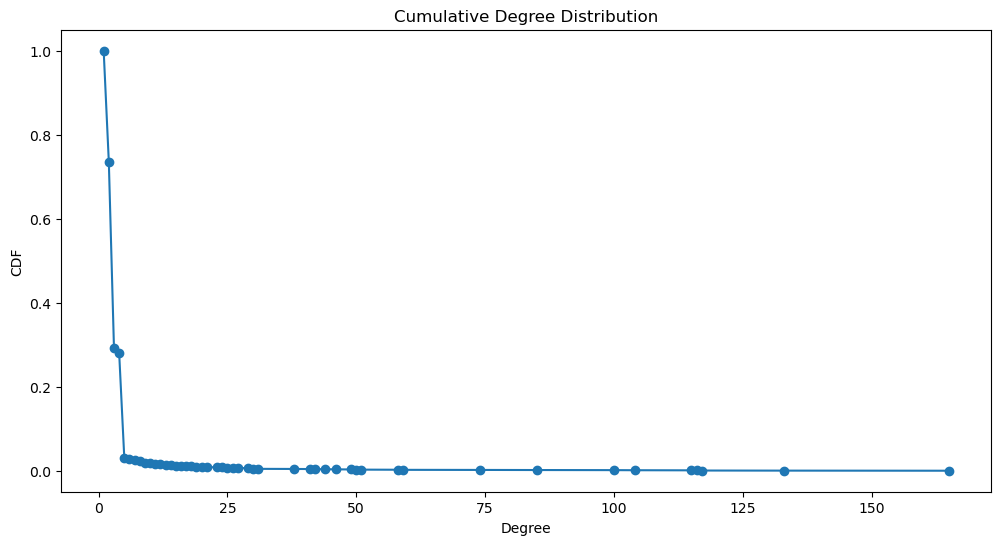

In [43]:
# Cumulative degree distribution
degree_sequence = sorted(degrees, reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())
cdf = np.cumsum(cnt) / len(degree_sequence)

plt.figure(figsize=(12, 6))
plt.plot(deg, cdf, marker='o')
plt.title("Cumulative Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("CDF")
plt.show()

A few nodes have high degrees (number of connections), and then follows the power-law distribution as displayed earlier in the log-log plot. 

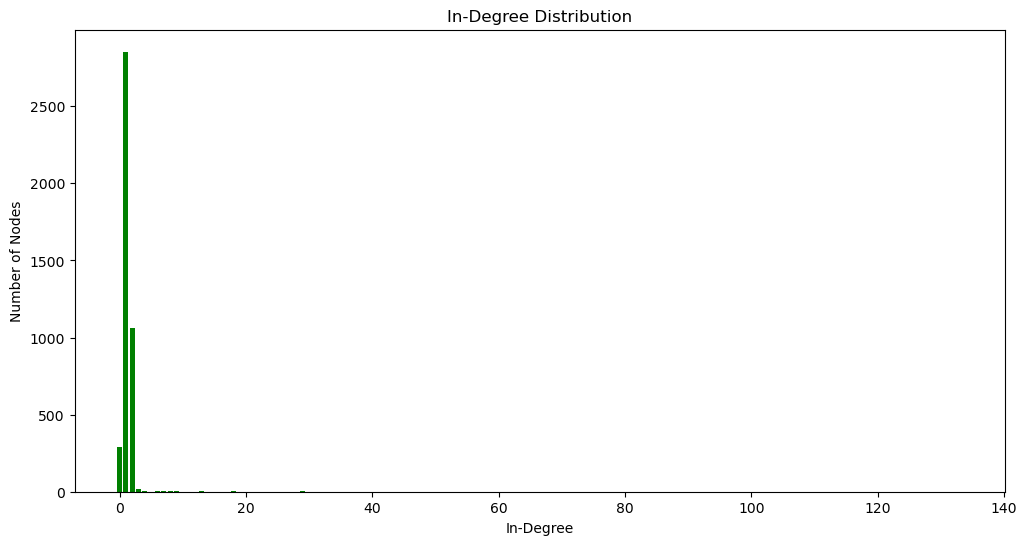

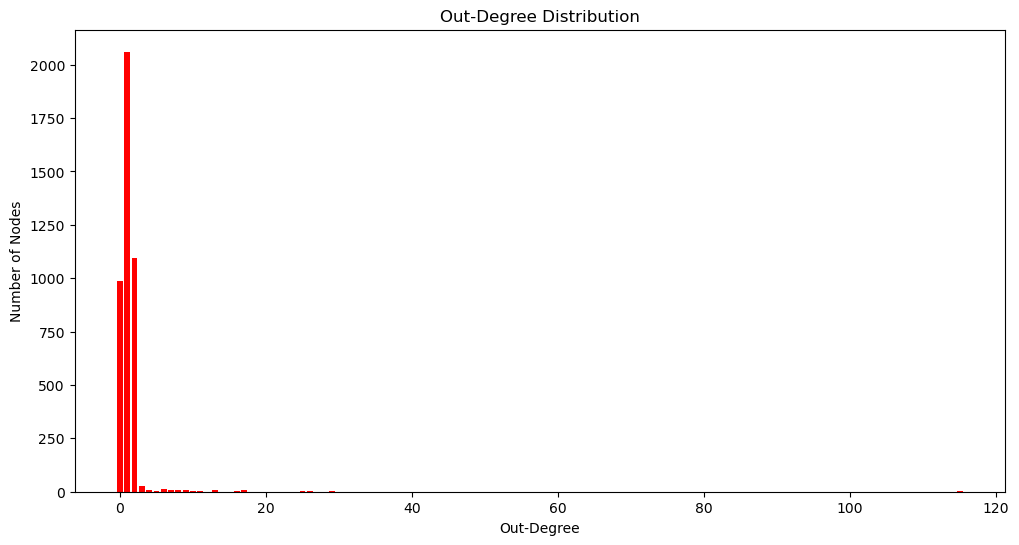

In [44]:
# In-degree and out-degree distributions (for directed graphs)
if G.is_directed():
    in_degrees = [G.in_degree(n) for n in G.nodes()]
    out_degrees = [G.out_degree(n) for n in G.nodes()]

    # Plot in-degree distribution
    in_degree_count = Counter(in_degrees)
    in_deg, in_cnt = zip(*in_degree_count.items())
    plt.figure(figsize=(12, 6))
    plt.bar(in_deg, in_cnt, width=0.80, color='g')
    plt.title("In-Degree Distribution")
    plt.xlabel("In-Degree")
    plt.ylabel("Number of Nodes")
    plt.show()

    # Plot out-degree distribution
    out_degree_count = Counter(out_degrees)
    out_deg, out_cnt = zip(*out_degree_count.items())
    plt.figure(figsize=(12, 6))
    plt.bar(out_deg, out_cnt, width=0.80, color='r')
    plt.title("Out-Degree Distribution")
    plt.xlabel("Out-Degree")
    plt.ylabel("Number of Nodes")
    plt.show()

The In-Degree Distribution calculates the nuumber of edges coming into the nodes and the Out-Degree Distribution calculates outgoing. The bar plots of in-degree and out-degree distributions show the frequency of nodes having each degree. High bars at low degrees indicate many nodes with few connections, while high bars at high degrees indicate fewer nodes with many connections. <br>
This visualization, similar to CDF, is another means of highlighting patterns such as the presence of hubs and the overall connectivity. This further validates that central nodes (hubs) exist.

In [56]:
node_null_count = 0
edge_null_count = 0

# Count null values in node attributes
for node, data in G.nodes(data=True):
    for attr, value in data.items():
        if value is None or (isinstance(value, float) and np.isnan(value)):
            node_null_count += 1

# Count null values in edge attributes
for u, v, data in G.edges(data=True):
    for attr, value in data.items():
        if value is None or (isinstance(value, float) and np.isnan(value)):
            edge_null_count += 1

print(f"Number of null values in node attributes: {node_null_count}")
print(f"Number of null values in edge attributes: {edge_null_count}")

Number of null values in node attributes: 0
Number of null values in edge attributes: 0


Rosa's EDA displayed Null Values in the raw dataset. However, using nx shows 0 null values.

In [58]:
if nx.is_directed(G):
    largest_weakly_cc = max(nx.weakly_connected_components(G), key=len)
    largest_strongly_cc = max(nx.strongly_connected_components(G), key=len)
    print(f"Largest weakly connected component size: {len(largest_weakly_cc)}")
    print(f"Largest strongly connected component size: {len(largest_strongly_cc)}")
else:
    largest_cc = max(nx.connected_components(G), key=len)
    print(f"Largest connected component size: {len(largest_cc)}")

Largest weakly connected component size: 4055
Largest strongly connected component size: 1


Largest Weakly Connected Component (WCC) contains 4055 nodes, which means that the largest subgraph, where nodes are connected without considering the direction of the edges. It implies that a large portion of the network can be traversed if you disregard the direction of the edges, showing a high level of overall connectivity in an undirected sense. <br>

Strongly Connected Component (SCC) contains only 1 node when there is a directed path from any node to every other node in the component. The graph lacks strong interconnectedness, and most nodes do not have reciprocal paths to each other.

References:<br>
[1] https://medium.com/p/a79d2684da53 <br>
[2] https://arxiv.org/pdf/2106.04513